## Getting Started with TensorFlow for Computer Vision



### Working with the basic building blocks of the Keras API

In [1]:
# Import the required libraries from the Keras API

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras import Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

In [2]:
# Create a model using the sequential API by passing a list of layers to the Sequential constructor.
# The numbers in each layer correspond to the number of neurons or units it contains.

layers = [Dense(256, input_shape=(28 * 28 * 1,),
                activation='sigmoid'),
          Dense(128, activation='sigmoid'),
          Dense(10, activation='softmax')]
sequential_model_list = Sequential(layers)

In [3]:
# Create a model using the add() method to add one layer at a time.
# The numbers in each layer correspond to the number of neurons or units it contains:

sequential_model = Sequential()
sequential_model.add(Dense(256, input_shape=(28 * 28 * 1,),
                activation='sigmoid'))
sequential_model.add(Dense(128, activation='sigmoid'))
sequential_model.add(Dense(10, activation='softmax'))

In [4]:
# Create a model using the Functional API.
# The numbers in each layer correspond to the number of neurons or units it contains:

input_layer = Input(shape=(28 * 28 * 1,))
dense_1 = Dense(256, activation='sigmoid')(input_layer)
dense_2 = Dense(128, activation='sigmoid')(dense_1)
predictions = Dense(10, activation='softmax')(dense_2)
functional_model = Model(inputs=input_layer,
                         outputs=predictions)


In [5]:
# Create a model using an object-oriented approach by sub-classing tensorflow.keras.models-Model.
# The numbers in each layer correspond to the number of neurons or units it contains:

class ClassModel(Model):
  def __init__(self):
    super(ClassModel, self).__init__()
    self.dense_1 = Dense(256, activation='sigmoid')
    self.dense_2 = Dense(128, activation='sigmoid')
    self.predictions = Dense(10, activation='softmax')

  def call(self, inputs, **kwargs):
    x = self.dense_1(inputs)
    x = self.dense_2(x)
    return self.predictions(x)

class_model = ClassModel()

In [6]:
# Prepare the data so that we can train all the models we defined previously.
# We must reshape the images into vector format because that's the format that's expected by a fully connected network

(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 *1))

X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [7]:
# One-hot encode the labels to break any undesired ordering bias:

label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)

In [8]:
# Take 20% of the data for validation

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)

In [10]:
# Compile, train the model for 50 epochs, and evaluate them on the test set

models = {
    'sequential_model' : sequential_model,
    'sequential_model_list': sequential_model_list,
    'functional_model': functional_model,
    'class_model': class_model
}

for name, model in models.items():
  print(f'Compiling model: {name}')
  model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
  print(f'Training model: {name}')
  model.fit(X_train, y_train,
            validation_data=(X_valid, y_valid),
            epochs=50,
            batch_size=256,
            verbose=0)

  _, accuracy = model.evaluate(X_test, y_test, verbose = 0)
  print(f'Testing model: {name} . \nAccuracy: {accuracy}')
  print('---')

Compiling model: sequential_model
Training model: sequential_model
Testing model: sequential_model . 
Accuracy: 0.9818999767303467
---
Compiling model: sequential_model_list
Training model: sequential_model_list
Testing model: sequential_model_list . 
Accuracy: 0.9750000238418579
---
Compiling model: functional_model
Training model: functional_model
Testing model: functional_model . 
Accuracy: 0.980400025844574
---
Compiling model: class_model
Training model: class_model
Testing model: class_model . 
Accuracy: 0.9800000190734863
---


We defined the same architecture using both the Sequential and Functional APIs, which correspond to the symbolic or declarative way of implementing networks, and also a third tiem using an imperative approach. <br> To make clear that, in the end, the three networks are the same, no matter which approach we took, we trained and evaluated them on the ffamous MNIST dataset, obtaining a decent 98% accuracy on the test set.

If you are runnning this locally, for the next section of this notebook, you should need to instal `pillow`

In [11]:
# pip install pillow

### Loading images using the Keras API

In [12]:
# Import the necessary packages

import glob
import os
import tarfile
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import get_file

In [13]:
# Define the URL and destination of the CINIC-10 dataset, an alternative to the famous CIFAR-10 dataset

DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = 'cinic10'
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

In [14]:
# Download and decompress the data. By default, it will be stored in ~/.keras/datasets/<FILE_NAME>

downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)


687544992/687544992 [==============================] - 518s 1us/step


In [15]:
# Build the path to the data directory based on the location of the downloaded file
data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
data_directory = os.path.sep.join([data_directory, DATA_NAME])

In [16]:
# Only extract the data if it hasn´t been extracted yet.
if not os.path.exists(data_directory) :
  tar = tarfile.open(downloaded_file_location)
  tar.extractall(data_directory)

In [17]:
# Load all the image paths and print the number of images
data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])
image_paths = list(glob.glob(data_pattern))
print(f'There are {len(image_paths):,} images in the dataset')

There are 270,000 images in the dataset


In [19]:
# lOAD A SINGLE IMAGE FROM THE DATA SET AND PRINT ITS METADATA

sample_image = load_img(image_paths[0])
print(f'Image type: {type(sample_image)}')
print(f'Image format: {sample_image.format}')
print(f'Image mode: {sample_image.mode}')
print(f'Image size: {sample_image.size}')

Image type: <class 'PIL.PngImagePlugin.PngImageFile'>
Image format: PNG
Image mode: RGB
Image size: (32, 32)


In [20]:
# Convert image to a numpy array

sample_image_array = img_to_array(sample_image)
print(f'Image type: {type(sample_image_array)}')
print(f'Image array shape: {sample_image_array.shape}')

Image type: <class 'numpy.ndarray'>
Image array shape: (32, 32, 3)


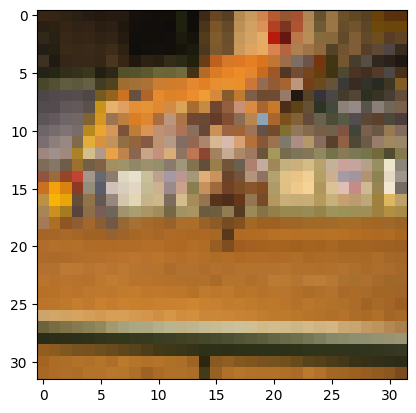

In [21]:
# Display a image using `matplotlib`

plt.imshow(sample_image_array / 255.0)

In [22]:
# Load a batch of images using ImageDataGenerator.
# As in the previous step, each image will be rescaled to the range [0,1]

image_generator = ImageDataGenerator(horizontal_flip=True, rescale=1.0 / 255.0)

Found 270000 images belonging to 3 classes.


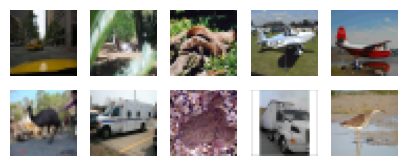

In [25]:
# Using image_generator, we`ll pick and display a random batch of 10 images directly from the directory they are stored in
iterator = (image_generator.flow_from_directory(directory=data_directory, batch_size=10))

for batch, _ in iterator:
  plt.figure(figsize=(5, 5))
  for index, image in enumerate(batch, start=1):
    ax = plt.subplot(5, 5, index)
    plt.imshow(image)
    plt.axis('off')
  plt.show()
  break

### Loading images using the tf.data.dataset API

It's functional style interface, as well as its high level of optimization, makes it a better alternative than the traditional KerasAPI for large projects, where efficiency and performance is a must.

In [26]:
# Import all the packages needed

import os
import tarfile
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import get_file

In [27]:
# Define the URL and destination of the CINIC-10 dataset, an alternative to the famous CIFAR-10 dataset

DATASET_URL = 'https://datashare.is.ed.ac.uk/bitstream/handle/10283/3192/CINIC-10.tar.gz?sequence=4&isAllowed=y'
DATA_NAME = 'cinic10'
FILE_EXTENSION = 'tar.gz'
FILE_NAME = '.'.join([DATA_NAME, FILE_EXTENSION])

In [28]:
# Download and decompress the data. By default, it will be stored in ~/.keras/datasets/<FILE_NAME>

downloaded_file_location = get_file(origin=DATASET_URL, fname=FILE_NAME, extract=False)

In [29]:
# Build the path to the data directory based on the location of the downloaded file
data_directory, _ = downloaded_file_location.rsplit(os.path.sep, maxsplit=1)
data_directory = os.path.sep.join([data_directory, DATA_NAME])

In [30]:
# Only extract the data if it hasn´t been extracted yet.
if not os.path.exists(data_directory) :
  tar = tarfile.open(downloaded_file_location)
  tar.extractall(data_directory)

In [31]:
# Create a Dataset of image paths using a glob-like pattern

data_pattern = os.path.sep.join([data_directory, '*/*/*.png'])
image_dataset = tf.data.Dataset.list_files(data_pattern)

In [32]:
# Take a single path from the dataset and use it to read the corresponding image

for file_path in image_dataset.take(1):
  sample_path = file_path.numpy()
sample_image = tf.io.read_file(sample_path)

In [33]:
# Decode the image from its PNG format to a NumPy array

sample_image = tf.image.decode_png(sample_image, channels=3)
sample_image = sample_image.numpy()

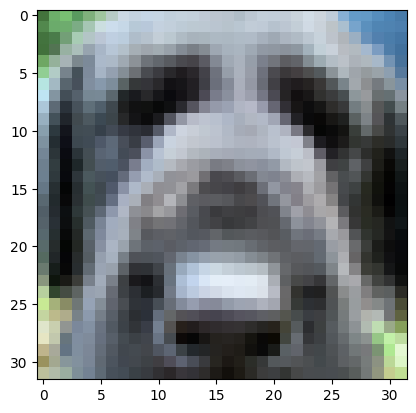

In [36]:
# Display the image using matplotlib

plt.imshow(sample_image / 255.0)

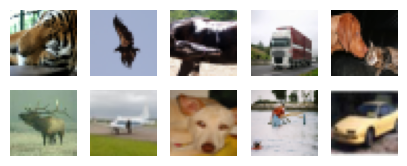

In [39]:
# Take the first 10 elements of image_dataset, decode and normalize them, and then display them using matplotlib

plt.figure(figsize=(5, 5))
for index, image_path in enumerate(image_dataset.take(10), start=1):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, channels=3)
  image = tf.image.convert_image_dtype(image, np.float32)
  ax = plt.subplot(5, 5, index)
  plt.imshow(image)
  plt.axis('off')

plt.show()
plt.close()